# Wrangling, analyzing and visualizing "WeRateDogs" Twitter data

## Introduction

Real-world data rarely comes clean. The objectif of this work is to wrangle **WeRateDogs** Twitter data, which is a Twitter account that rates people's dogs with a humorous comment about the dog , so as to create interesting and trustworthy analyses and visualizations. Data wrangling refers to the process of cleaning, restructuring and enriching the raw data available into a more usable format.

The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for worthy analyses and visualizations. By using Python and its libraries, i will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

***Data description***

* The **WeRateDogs** Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which has been used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo), to make this Twitter archive "enhanced." Of the 5000+ tweets, they have been filtered for tweets with ratings only (there are 2356). These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.However, the ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. So, i'll need to assess and clean these columns, to use them for analysis and visualization.


* The **tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. It is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


* The **Tweet JSON** data written to its own line in a file called tweet_json.txt file, including information about tweet's retweet count and favorite ("like") count. 

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">I- Data gathering</a></li>
<li><a href="#assess">II- Data assessing</a></li>
<ol>
<li><a href="#archive">Twitter archive</a></li>
<li><a href="#image">Image predictions</a></li>
<li><a href="#json">Tweet json</a></li>
</ol>
</ul>
<ul>
<li><a href="#clean">III- Data cleaning</a></li>
<li><a href="#analyze">IV- Analyzing and visualizing data</a></li>
</ul>

<a id='gathering'></a>
## I- Data gathering

Gathering data is the first step in data wrangling. I will obtain data by downloading a TSV file from the internet, csv file, json file, etc. and importing that data into the programming environment (Jupyter Notebook).

First of all, it's necessary to import all the packages that could be useful for my analysis.

In [1]:
# Import all the packages needed for my analysis

import pandas as pd
import numpy as np
import requests
import json
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO

%matplotlib inline

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', 200)

### Twitter archive enhanced file

In [2]:
#Load WeRateDogs Twitter archive Data
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

### Image predictions file

In [3]:
# Use requests library to download tsv file from Udacity's server
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Save the file to the computer
with open('image-predictions.tsv', mode='wb') as file:
        file.write(r.content)
        
# Read TSV file
image_predictions=pd.read_csv('image-predictions.tsv', sep="\t")

### Tweet JSON data

In [4]:
#  Read tweet's JSON data line by line 
selected_attr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
# Create a dictionary with the JSON data
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
        
# Create dataFrame from list of dictionaries
tweets_df = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])


<a id='assess'></a>
## II- Data assessing

After gathering the data, the second step is to assess data n the three datasets, visually and programmatically. The main objectif of this section is to look for uncleaned data in all the three DataFrames, in particular for quality issues (Completeness, Validity, Accuracy and Consistency) and tidiness . The later is  where each variable forms a column, each observation forms a row and each type of observational unit forms a table.

<a id='archive'></a>
### 1-Twitter archive

In [5]:
# Print first five rows of the dataset
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

In [6]:
# A concise summary of the dataframe,including the number of non-null values in each colum
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**_Notes_**

>There are several quality and tidiness issues:
* There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
* There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
* There are 2297 tweets with expanded_urls 
* The timestamp field is in string format (object) and the tweet_id is integer format.
* There are 4 columns for dog stages (doggo, floofer, pupper, puppo)


In [7]:
# Returns the datatype of the timestamp column
type(twitter_archive.timestamp[0])

str

In [8]:
# Finding original in the dataset
twitter_archive['retweeted_status_id'].notnull().sum()

181

In [9]:
# Count total rows in each column which contain null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

_**Notes**_
>There are 59 missing values in expanded_urls.

#### *Expanded urls*

In [10]:
# Count the missing urls that are retweets or replies
sum(twitter_archive.expanded_urls.isnull() & 
    (twitter_archive.in_reply_to_status_id.notnull()| \
     twitter_archive.retweeted_status_id.notnull()))

56

In [11]:
# Count the missing urls that are original tweets
sum(twitter_archive.expanded_urls.isnull() & 
    twitter_archive.in_reply_to_status_id.isnull()&
     twitter_archive.retweeted_status_id.isnull())

3

In [12]:
twitter_archive[twitter_archive.expanded_urls.isnull() & 
    twitter_archive.in_reply_to_status_id.isnull()&
     twitter_archive.retweeted_status_id.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
375   828361771580813312                    NaN                  NaN   
707   785515384317313025                    NaN                  NaN   
1445  696518437233913856                    NaN                  NaN   

                      timestamp  \
375   2017-02-05 21:56:51 +0000   
707   2016-10-10 16:20:36 +0000   
1445  2016-02-08 02:18:30 +0000   

                                                                                  source  \
375                   <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   
707   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1445  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                           text  \
375   Beebop and Doobert should start a band 12/10 would listen   
707              Today, 10/10, should be National Dog Rates Day   
1445            Oh my god 10/10 for every little hot dog pupper   

      retweeted_status_id  retweeted_status_user_id  \
375                   NaN                       NaN   
707                   NaN                       NaN   
1445                  NaN                       NaN   

     retweeted_status_timestamp expanded_urls  rating_numerator  \
375                         NaN           NaN                12   
707                         NaN           NaN                10   
1445                        NaN           NaN                10   

      rating_denominator  name doggo floofer  pupper puppo  
375                   10  None  None    None    None  None  
707                   10  None  None    None    None  None  
1445                  10  None  None    None  pupper  None

**_Notes_**
> I found that there are 56 missing urls that are retweets or replies and only 3 that are original. I will check if these 3 original tweets are part of the two other tables.

In [13]:
# Search for the missing urls tweets in the other tables 
urls_missing=[828361771580813312, 785515384317313025,696518437233913856]
find_index=image_predictions.tweet_id.isin(urls_missing)
sum(find_index)

0

In [14]:
urls_missing=[828361771580813312, 785515384317313025,696518437233913856]
find_index=tweets_df.tweet_id.isin(urls_missing)
sum(find_index)

3

**_Notes_**
> I notice that these tweets are not in image predictions table but they are in the json data. Unfortunatly this table doesn't provide image url.

#### *Tweet id*

In [15]:
# Check for duplicates in the data
twitter_archive['tweet_id'].duplicated().sum()

0

> There is no duplicates in tweet id. 

#### *Rating numerator and denominator*

In [16]:
# Print descriptive statistics for the column selected
twitter_archive[['rating_numerator','rating_denominator']].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

> There are some quality issues; the minimum for both numerator and denominator is 0 (it should be "10") and and the maximum for both is very huge, in the order of 1776 and 170 respectively.

In [17]:
# Number of occurance of each rating_denominator
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [18]:
# Rows with ratings denominator that are not according to rules which could lead to erroneous information
column_sel=['tweet_id','text','rating_numerator','rating_denominator']
twitter_archive[twitter_archive.rating_denominator!=10][column_sel]

tweet_id  \
313   835246439529840640   
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
784   775096608509886464   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
784                                RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her

In [19]:
# Count tweets that dont have denominator of 10 
sum(twitter_archive.rating_denominator!=10)

23

In [20]:
# Count tweets that dont have denominator of 10 and are not retweets or replays 
filter_denominat=(twitter_archive.rating_denominator!=10) &\
                  twitter_archive.in_reply_to_status_id.isnull() &\
                  twitter_archive.retweeted_status_id.isnull()
sum(filter_denominat)

17

In [21]:
# Display tweets that dont have denominator of 10 and are not retweets or replays 
twitter_archive[filter_denominat][column_sel]

tweet_id  \
433   820690176645140481   
516   810984652412424192   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1635  684222868335505415   
1662  682962037429899265   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2335                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
433                 84                  70  
516                 24                   7  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165              

**_Notes_**
> There are 17 original tweets that don't have 10 in the denominator. Many of these are about multiple dogs, because we find in text 'floofs', '9 puppers','puppers','squad','Cletus, Jerome, Alejandro....'

In [22]:
# Number of occurance of each rating numerator
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

> There are some extreme values 1776 or 960...
In the source data, there seems to be fractional numerators, this means that there are some numerators that were'nt well extracted.

In [23]:
# Find incorrect numerators 
twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]\
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

**_Notes_**
> There are 6 numerators that were not well extracted while the denominators are correct. As an example, in row 695 the correct rating is 9.75 but was extracted as 75.

#### *Name*

In [24]:
# Check name column
twitter_archive.name.tail(20)

2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345     the
2346     the
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

**_Notes_**
> There are several rows with unusual names or missing names. 
It looks like the dog names are all capitalized, so words that begin in lowercase are not names, like "a", "an", "the"...

In [25]:
# List all names that aren't capitalized
erron_names = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[erron_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [26]:
len(twitter_archive[erron_names])

109

#### Notes
> There are 109 non-capitalized words from the name column that aren't valid.

#### Source

In [27]:
# Number of occurance of each source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Notes 
>The source is unreadable. There are 4 unique sources: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck.

##### Text

In [28]:
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [29]:
# Count rows that have http in the end
(twitter_archive.text.str.contains("http")==False).sum()

70

**_Notes_**
>In the end of 70 rows ofthe "text" column, there is an url link for tweet.

<a id='image'></a>
### 2- Image predictions


In [30]:
# Print first five rows of the dataset
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

**_Notes_**

The image predictions columns:

* tweet_id: the unique identifier for each tweet
* jpg_url: dog's image URL
* img_num: the image number that corresponded to the most confident prediction
* p1: algorithm's #1 prediction for the image in the tweet
* p1_conf: how confident the algorithm is in its #1 prediction
* p1_dog: whether or not the #1 prediction is a breed of dog
* p2: algorithm's #2 prediction for the image in the tweet
* p2_conf: how confident the algorithm is in its #2 prediction
* p2_dog: whether or not the #2 prediction is a breed of dog
* p3: algorithm's #3 prediction for the image in the tweet
* p3_conf: how confident the algorithm is in its #3 prediction
* p3_dog: whether or not the #3 prediction is a breed of dog

In [31]:
# A concise summary of the dataframe,including the number of non-null values in each column
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions[['p1','p2','p3']]

p1                  p2                           p3
0     Welsh_springer_spaniel              collie            Shetland_sheepdog
1                    redbone  miniature_pinscher          Rhodesian_ridgeback
2            German_shepherd            malinois                   bloodhound
3        Rhodesian_ridgeback             redbone           miniature_pinscher
4         miniature_pinscher          Rottweiler                     Doberman
...                      ...                 ...                          ...
2070                  basset    English_springer  German_short-haired_pointer
2071             paper_towel  Labrador_retriever                      spatula
2072               Chihuahua            malamute                       kelpie
2073               Chihuahua            Pekinese                     papillon
2074                  orange               bagel                       banana

[2075 rows x 3 columns]

_**Notes**_
>The prediction dog breeds involve both uppercase and lowercase for the first letter.

In [33]:
# Count the entries that don't predict dogs
image_predictions.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

<a id='json'></a>
### 3-  Tweet json 

In [34]:
# Print first five rows of the dataset
tweets_df.head()

tweet_id  favorites  retweets
0  892420643555336193      39467      8853
1  892177421306343426      33819      6514
2  891815181378084864      25461      4328
3  891689557279858688      42908      8964
4  891327558926688256      41048      9774

_**Notes**_
>* id: the unique identifier for each tweet;
* retweet_count: number of times this tweet has been retweeted;
* favorite_count: indicates approximately how many times this tweet has been liked by Twitter users.

In [35]:
# A concise summary of the dataframe,including the number of non-null values in each column
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
# Print descriptive statistics for the column selected
tweets_df.describe()

tweet_id      favorites      retweets
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000

### Assessing summary

**Quality issues**

Twitter Archive WeRateDogs
* There are 78 replies ('in_reply_to_status_id', 'in_reply_to_user_id'), and 181 retweets('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp').
* Erroneous datatypes: 'timestamp' column is a string format and the 'tweet_id' is integer format.
* 'Source' content is unreadable, there are 4 unique sources: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck.
* There are Urls in the end of the 'text'.
* There are 109 names of dogs are mislabelled or mispelled. 
* There are 17 tweets with 'rating denominator' that are not according to rules which could lead to erroneous information.
* There are 6  tweets that having 'rating_numerator'  with incorrect values, that weren't extracted well and there are some huge number of tweets with rating numerator >> 10 with a  maximum value  1776, which doesn't make sense. 
* Erroneous datatypes of 'rating numerator' and 'rating denominator'.
* There are 56 missing 'expanded_urls' that are retweets or replies and only 3 that are original.

Image Predictions
* Erroneous datatypes: 'tweet_id'.
* The prediction dog breeds involve both uppercase and lowercase for the first letter and also include "_"

Tweet JSON
*  Erroneous datatypes: 'tweet_id'.


**Tidiness issues**
* There are 3 dataframes.

Twitter Archive WeRateDogs
* There are 4 columns for dog stages (doggo, floofer, pupper, puppo).
* 'Timestamp' column contains two variables: date and time.

Image Predictions
* Image prediction should be summarized to one column.

<a id='clean'></a>
## III- Data cleaning

In the section, i will clean all the quality and tidiness issues found in the second section. It doesn’t mean  that i will be changing the data to make it say something different, i will just clean  data when inaccurate, removing when irrelevant and replacing when missing. For the tidiness issues, i will transform the dataset so that each variable is a column, each observation is a row, and each type of observational unit is a table.


In [37]:
# Make copies for cleaning
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
tweets_df_clean=tweets_df.copy()

#### `Tidiness1` :  Three dataframes 

##### Define

Merge first 'twitter_archive_clean' and 'img_predictions_clean' datasets on tweet_id using merge method then merge the new one and 'tweets_df_clean' on tweet_id.

##### Code

In [38]:
# Merge 'twitter_archive_clean' and 'img_predictions_clean'
df_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                                   how = 'inner', on = 'tweet_id')
# Merge 'df_clean' and 'tweets_df_clean'
df_clean = pd.merge(df_clean, tweets_df_clean,
                                   how = 'inner', on = 'tweet_id')

##### Test

In [39]:
# Confirm correction by recheking info function
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

#### `Tidiness 2` :  four variables of dog stages, should be in a single column

##### Define

Melt the four columns 'doggo', 'floofer','pupper','puppo' to a dog stage column. Drop the four unused columns.

##### Code

In [40]:
# Handle none
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
# Merge into column
df_clean['dog_stage'] = df_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1) 
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Handle missing values
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan
#drop unused columns
df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

#-------------------------------------------------Quality issue-----------------------------------------------------------
# convert datatype of the new column
df_clean['dog_stage'] = df_clean['dog_stage'].astype('category')

##### Test

In [41]:
# confirm correction
df_clean.dog_stage.value_counts()

pupper            210
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### `Quality 1` : 181 retweets 

##### Define

Keep only rows that are original tweets, not retweets by selecting the rows that is null and delete the rest.

##### Code

In [42]:
# Removing the retweet information 
df_clean=df_clean[df_clean.retweeted_status_id.isnull()]
df_clean=df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean=df_clean[df_clean.retweeted_status_timestamp.isnull()]

In [43]:
# Delete all retweet columns
df_clean=df_clean.drop('retweeted_status_id', axis=1)
df_clean=df_clean.drop('retweeted_status_user_id', axis=1)
df_clean=df_clean.drop('retweeted_status_timestamp', axis=1)

##### Test

In [44]:
# Confirm correction by recheking info function
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               1994 non-null   int64   
 1   in_reply_to_status_id  23 non-null     float64 
 2   in_reply_to_user_id    23 non-null     float64 
 3   timestamp              1994 non-null   object  
 4   source                 1994 non-null   object  
 5   text                   1994 non-null   object  
 6   expanded_urls          1994 non-null   object  
 7   rating_numerator       1994 non-null   int64   
 8   rating_denominator     1994 non-null   int64   
 9   name                   1994 non-null   object  
 10  jpg_url                1994 non-null   object  
 11  img_num                1994 non-null   int64   
 12  p1                     1994 non-null   object  
 13  p1_conf                1994 non-null   float64 
 14  p1_dog                 1994 non-null   b

#### `Quality 2` :  78 replies 

##### Define

Keep only rows that are original tweets and not replies by selecting the rows that is null and delete the rest.

##### Code

In [45]:
# Removing the replies information 
df_clean=df_clean[df_clean.in_reply_to_status_id.isnull()]
df_clean=df_clean[df_clean.in_reply_to_user_id.isnull()]

In [46]:
# Drop all replies columns
df_clean=df_clean.drop('in_reply_to_status_id', axis=1)
df_clean=df_clean.drop('in_reply_to_user_id', axis=1)

##### Test

In [47]:
# Confirm correction by recheking info function
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   object  
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   jpg_url             1971 non-null   object  
 9   img_num             1971 non-null   int64   
 10  p1                  1971 non-null   object  
 11  p1_conf             1971 non-null   float64 
 12  p1_dog              1971 non-null   bool    
 13  p2                  1971 non-null   object  
 14  p2_conf             1971 non-null   float64 
 15  p2_dog              1971 non-null   bo

#### `Quality 3` :  erroneous datatypes (timestamp, tweet_id)

##### Define

The timestamp format is string. I will convert it to date datatype.
Tweet_id column needs to be converted from a number to string value

##### Code

In [48]:
# Convert 'timestamp' type from str to datetime 
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])


In [49]:
# Convert 'tweet_id' type from int to str
df_clean.tweet_id=df_clean.tweet_id.astype(str)

##### Test

In [50]:
# Confirm correction by recheking dtype function
df_clean.timestamp.dtype

datetime64[ns, UTC]

In [51]:
type(df_clean.tweet_id[0])

str

#### `Tidiness 3` :  Timestamp column contains two variables: date and time

##### Define

Extract the date and time variables from the timestamp column using regular expressions and pandas' method. Drop the timestamp column when done.

##### Code

In [52]:
# Extract date information from timestamp column
df_clean['date'] = df_clean['timestamp'].dt.date

In [53]:
# Extract date information from timestamp column
df_clean['time'] = df_clean['timestamp'].dt.time

In [54]:
# Convert 'date'   type from str to datetime 
df_clean['date']=pd.to_datetime(df_clean['date'])

In [55]:
df_clean.drop(['timestamp'], axis=1, inplace=True)

##### Test

In [56]:
# Confirm correction by recheking info function
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   source              1971 non-null   object        
 2   text                1971 non-null   object        
 3   expanded_urls       1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   jpg_url             1971 non-null   object        
 8   img_num             1971 non-null   int64         
 9   p1                  1971 non-null   object        
 10  p1_conf             1971 non-null   float64       
 11  p1_dog              1971 non-null   bool          
 12  p2                  1971 non-null   object        
 13  p2_conf             1971 non-null   float64     

#### `Quality 4` : Source content unreadable

##### Define

Cleaning the source's content to make it more readable by removing tags.

##### Code

In [57]:
# Create function that remove tags
def remove_tags(string):
    results = re.sub('<.*?>','',string)
    return results
df_clean['source']=df_clean['source'].apply(lambda x : remove_tags(x))

##### Test

In [58]:
# Confirm correction
df_clean['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### `Quality 5` : An Url in  the end of 'text '

##### Define

Remove URL from the end of the text

##### Code

In [59]:
# We need to add '' in order to cut off the last element
df_clean.text=df_clean.text+''
df_clean.text=df_clean.text.apply(lambda x:x[: x.find("http")]).str.strip()

##### Test

In [60]:
(df_clean.text.str.contains("http")==False).sum()

1971

In [61]:
df_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   source              1971 non-null   object        
 2   text                1971 non-null   object        
 3   expanded_urls       1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   jpg_url             1971 non-null   object        
 8   img_num             1971 non-null   int64         
 9   p1                  1971 non-null   object        
 10  p1_conf             1971 non-null   float64       
 11  p1_dog              1971 non-null   bool          
 12  p2                  1971 non-null   object        
 13  p2_conf             1971 non-null   float64     

#### `Quality 6` :  Dogs names mislabelled and missing

##### Define

Names of dogs are miss labelled, mispelled or missing.

##### Code

In [63]:
# Replace lowercase names by None
mask1 = df_clean.name.str.islower()
df_clean.loc[(mask1), 'name'] = np.NaN
df_clean['name'] = df_clean['name'].replace('None', np.NaN)

##### Test

In [64]:
df_clean.name.tail(50)

2023           NaN
2024           NaN
2025          Jeph
2026       Jockson
2027           NaN
2028           NaN
2029         Josep
2030         Lugan
2031           NaN
2032    Christoper
2033           NaN
2034       Jimothy
2035      Kreggory
2036         Scout
2037           NaN
2038           NaN
2039           NaN
2040           NaN
2041           NaN
2042        Walter
2043           NaN
2044           NaN
2045           NaN
2046           NaN
2047           NaN
2048           NaN
2049           NaN
2050           NaN
2051           NaN
2052           NaN
2053           NaN
2054           NaN
2055           NaN
2056           NaN
2057           NaN
2058           NaN
2059           NaN
2060           NaN
2061           NaN
2062           NaN
2063           NaN
2064           NaN
2065           NaN
2066           NaN
2067           NaN
2068           NaN
2069           NaN
2070           NaN
2071           NaN
2072           NaN
Name: name, dtype: object

#### `Quality 7` :  The "rating_numerator and denominator  has some incorrect values.

##### Define

Extract both  numerator and denominator from 'text' column.

##### Code

In [65]:
# Extract rating numerators from 'text' column and attribute them to'rating_numerator' column
df_clean[['rating_numerator','rating_denominator']]= df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)

##### Test

In [66]:
df_clean['rating_numerator'].value_counts()

12       446
10       417
11       392
13       253
9        150
8         95
7         52
14        33
6         32
5         32
3         19
4         16
2          9
1          5
121        1
60         1
11.27      1
165        1
84         1
24         1
80         1
204        1
1776       1
11.26      1
88         1
144        1
50         1
99         1
44         1
0          1
45         1
9.75       1
13.5       1
420        1
Name: rating_numerator, dtype: int64

In [67]:
df_clean['rating_denominator'].value_counts()

10     1954
50        3
11        2
80        2
90        1
150       1
170       1
7         1
70        1
110       1
2         1
120       1
20        1
40        1
Name: rating_denominator, dtype: int64

#### `Quality 8` : Erroneous datatype (rating numerator and denominator)

##### Define

Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as float.

##### Code

In [68]:
# Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as float
df_clean['rating_numerator']= df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator']= df_clean['rating_denominator'].astype(float)

##### Test

In [69]:
type(df_clean.rating_numerator[0])

numpy.float64

In [70]:
type(df_clean.rating_denominator[0])

numpy.float64

#### `Quality 9` : Some rating denominator different to 10 and numerator are huge

##### Define

keep only rows where numerator is between 1-14 and the denominator is 10

##### Code

In [71]:
# Keep only rows where numerator is between 1-14 and the denominator is 10
df_clean = df_clean[(df_clean.rating_numerator > 0) & (df_clean.rating_numerator < 15) &
                          (df_clean.rating_denominator == 10)]

##### Test

In [72]:
df_clean.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1951.000000              1951.0  1951.000000  1951.000000   
mean          10.548324                10.0     1.201435     0.594160   
std            2.157982                 0.0     0.558311     0.272178   
min            1.000000                10.0     1.000000     0.044333   
25%           10.000000                10.0     1.000000     0.362715   
50%           11.000000                10.0     1.000000     0.587507   
75%           12.000000                10.0     1.000000     0.846807   
max           14.000000                10.0     4.000000     1.000000   

            p2_conf       p3_conf     favorites      retweets  
count  1.951000e+03  1.951000e+03    1951.00000   1951.000000  
mean   1.350072e-01  6.013966e-02    8965.57919   2784.740646  
std    1.011905e-01  5.083308e-02   12306.35162   4708.818673  
min    1.011300e-08  1.740170e-10      81.00000     16.000000  
25%    5.370120e-02  1.600860e-02    1956.50000    623.500000  
50%    1.180890e-01  4.947150e-02    4144.00000   1360.000000  
75%    1.963605e-01  9.158675e-02   11413.50000   3239.000000  
max    4.880140e-01  2.710420e-01  132810.00000  79515.000000

#### `Quality 10` :  Rating denominator unused anymore

##### Define

Since all the values in the 'rating_denominator' column are 10, so we don't need this column any more.
I will rename 'rating_numerator' column by 'rating'.

##### Code

In [73]:
# Drop column
df_clean.drop(['rating_denominator'], axis = 1, inplace = True)
# Rename column
df_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

##### Test

In [74]:
# Confirm correction by recheking info function
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1951 non-null   object        
 1   source         1951 non-null   object        
 2   text           1951 non-null   object        
 3   expanded_urls  1951 non-null   object        
 4   rating         1951 non-null   float64       
 5   name           1345 non-null   object        
 6   jpg_url        1951 non-null   object        
 7   img_num        1951 non-null   int64         
 8   p1             1951 non-null   object        
 9   p1_conf        1951 non-null   float64       
 10  p1_dog         1951 non-null   bool          
 11  p2             1951 non-null   object        
 12  p2_conf        1951 non-null   float64       
 13  p2_dog         1951 non-null   bool          
 14  p3             1951 non-null   object        
 15  p3_conf        1951 non-nu

#### `Quality 11` : Missing data in expanded_urls

##### Define

Drop tweets with missing data in the expanded_urls.

##### Code

In [75]:
# Remove the null values
df_clean=df_clean[df_clean.expanded_urls.notnull()]

##### Test

In [76]:
# Checks if any of there are null values in the expanded url column - should print False
df_clean.expanded_urls.isnull().sum().any()

False

#### `Quality 12` : "_" and use all lowercases for the image predictions

##### Define

Remove '_' and capitalize names p1, p2, p3 columns

##### Code

In [77]:
# Remove '_'
df_clean['p1'] = df_clean['p1'].str.replace('_', " ")
df_clean['p2'] = df_clean['p2'].str.replace('_', " ")
df_clean['p3'] = df_clean['p3'].str.replace('_', " ")

In [78]:
df_clean['p1'] = df_clean['p1'].str.title()
df_clean['p2'] = df_clean['p2'].str.title()
df_clean['p3'] = df_clean['p3'].str.title()

##### Test

In [79]:
df_clean[['p1','p2','p3']]

p1                  p2                           p3
0                     Orange               Bagel                       Banana
1                  Chihuahua            Pekinese                     Papillon
2                  Chihuahua            Malamute                       Kelpie
3                Paper Towel  Labrador Retriever                      Spatula
4                     Basset    English Springer  German Short-Haired Pointer
...                      ...                 ...                          ...
2068      Miniature Pinscher          Rottweiler                     Doberman
2069     Rhodesian Ridgeback             Redbone           Miniature Pinscher
2070         German Shepherd            Malinois                   Bloodhound
2071                 Redbone  Miniature Pinscher          Rhodesian Ridgeback
2072  Welsh Springer Spaniel              Collie            Shetland Sheepdog

[1951 rows x 3 columns]

#### `Tidiness 4` : Multiple dog prediction

##### Define

Dog prediction should be summarized into one column

##### Code

In [80]:
# Define function to summarize the dog prediction
def pred_best(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

df_clean['dog_best'] = df_clean.apply(pred_best, axis = 1)

# Drop unused columns
df_clean = df_clean.drop(columns=['img_num','p1', 'p1_conf', 'p1_dog',
                                                'p2', 'p2_conf', 'p2_dog',
                                                'p3', 'p3_conf', 'p3_dog'])


##### Test

In [81]:
# Check the correction
df_clean[['tweet_id','dog_best']]

tweet_id                dog_best
0     892420643555336193                     NaN
1     892177421306343426               Chihuahua
2     891815181378084864               Chihuahua
3     891689557279858688      Labrador Retriever
4     891327558926688256                  Basset
...                  ...                     ...
2068  666049248165822465      Miniature Pinscher
2069  666044226329800704     Rhodesian Ridgeback
2070  666033412701032449         German Shepherd
2071  666029285002620928                 Redbone
2072  666020888022790149  Welsh Springer Spaniel

[1951 rows x 2 columns]

In [82]:
# Confirm correction by recheking info function
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 2072
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1951 non-null   object        
 1   source         1951 non-null   object        
 2   text           1951 non-null   object        
 3   expanded_urls  1951 non-null   object        
 4   rating         1951 non-null   float64       
 5   name           1345 non-null   object        
 6   jpg_url        1951 non-null   object        
 7   favorites      1951 non-null   int64         
 8   retweets       1951 non-null   int64         
 9   dog_stage      303 non-null    category      
 10  date           1951 non-null   datetime64[ns]
 11  time           1951 non-null   object        
 12  dog_best       1649 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 200.4+ KB


#### `Additional cleaning` 

##### Define

Reorder the columns to facilitate the analysis task

##### Code

In [83]:
column_list=list(df_clean)
# set the columns in a new order
column_list = ['tweet_id', 'date','time', 'rating', 'retweets', 'favorites',
            'dog_best','name', 'dog_stage', 'source', 'text','jpg_url','expanded_urls']

df_clean = df_clean[column_list]

##### Test

In [84]:
df_clean.head(2)

tweet_id       date      time  rating  retweets  favorites  \
0  892420643555336193 2017-08-01  16:23:56    13.0      8853      39467   
1  892177421306343426 2017-08-01  00:17:27    13.0      6514      33819   

    dog_best     name dog_stage              source  \
0        NaN  Phineas       NaN  Twitter for iPhone   
1  Chihuahua    Tilly       NaN  Twitter for iPhone   

                                                                                                                                         text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10   

                                           jpg_url  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

                                                     expanded_urls  
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1

### Store data

>I will store the cleaned table into the 'twitter_archive_master.csv' file. The cleaned data is ready for the analysis phase.

In [85]:
# Store the clean df in CSV file with name 'twitter_archive_master.csv'
df_clean.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## IV- Analyzing and visualizing data

### General properties

In [86]:
# Make a copy of the new table for analysis
rate_dogs_df=df_clean.copy()

In [87]:
# Number of rows and columns of dataset
rate_dogs_df.shape

(1951, 13)

In [88]:
# A concise summary of the dataframe,including the number of non-null values in each colum
rate_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 2072
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1951 non-null   object        
 1   date           1951 non-null   datetime64[ns]
 2   time           1951 non-null   object        
 3   rating         1951 non-null   float64       
 4   retweets       1951 non-null   int64         
 5   favorites      1951 non-null   int64         
 6   dog_best       1649 non-null   object        
 7   name           1345 non-null   object        
 8   dog_stage      303 non-null    category      
 9   source         1951 non-null   object        
 10  text           1951 non-null   object        
 11  jpg_url        1951 non-null   object        
 12  expanded_urls  1951 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 200.4+ KB


### Descriptive Statistics

In [89]:
# Print descriptive statistics for the column selected
rate_dogs_df.describe()

rating      retweets     favorites
count  1951.000000   1951.000000    1951.00000
mean     10.548324   2784.740646    8965.57919
std       2.157982   4708.818673   12306.35162
min       1.000000     16.000000      81.00000
25%      10.000000    623.500000    1956.50000
50%      11.000000   1360.000000    4144.00000
75%      12.000000   3239.000000   11413.50000
max      14.000000  79515.000000  132810.00000

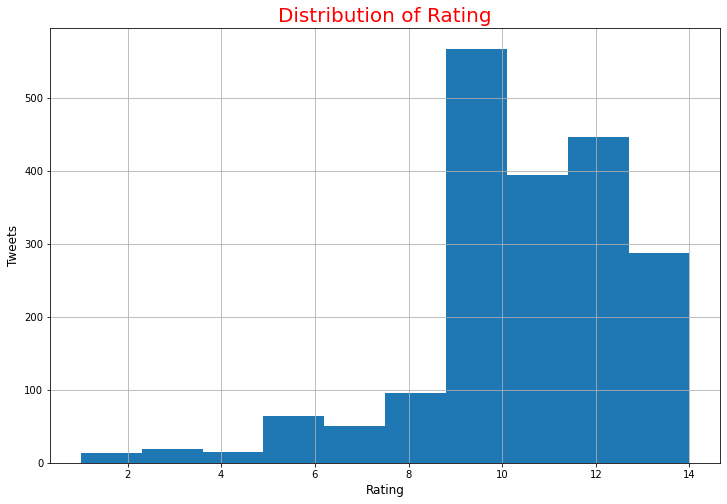

In [90]:
# Histogram
rate_dogs_df.rating.hist(figsize=(12,8));
plt.ylabel('Tweets', size=12)
plt.xlabel('Rating', size=12)
plt.title('Distribution of Rating',color="r", size=20)
plt.show();

_**Notes**_
>The distribution of ratings is skewed to the left.

### The relationship between favorite counts and retweets counts

Correlation Between favorite counts And retweet counts :  0.9134724611995907


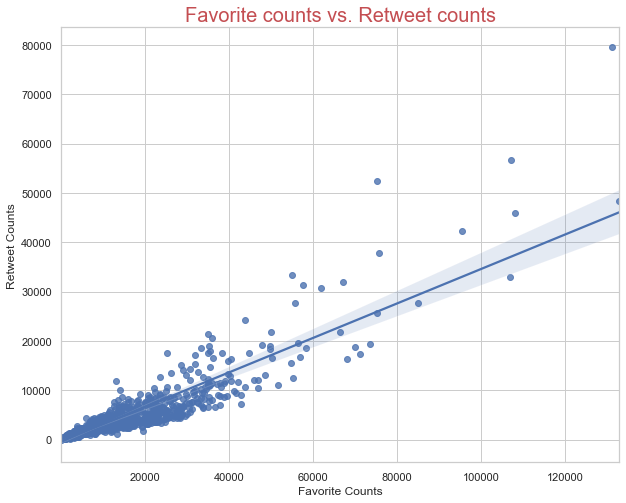

In [91]:
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")
sns.regplot(x='favorites', y='retweets', data=rate_dogs_df)

plt.title("Favorite counts vs. Retweet counts",color="r", size=20)
plt.ylabel("Retweet Counts", size=12)
plt.xlabel("Favorite Counts", size=12);

data_corr = rate_dogs_df.corr()

print("Correlation Between favorite counts And retweet counts : ",data_corr.loc['favorites','retweets'])

_**Notes**_

>The correlation has been used to test statistical relationships between favorite counts and retweet counts.
The coefficient is 0.91 so that we can conclude that there is a very high and a positive relationship between the two variables.

### The most common dog's breed 

In [92]:
rate_dogs_df.dog_best.value_counts().head(5)

Golden Retriever      153
Labrador Retriever    103
Pembroke               94
Chihuahua              89
Pug                    62
Name: dog_best, dtype: int64

#### Number of tweets with non predicted breed (null values)

In [93]:
# Number of tweets of non predicted breed (null values):
rate_dogs_df.dog_best.isnull().sum()

302

_**Notes**_
> There are 302 tweets with non predicted breed. So i will a new dataframe with only non-null value for dog_best column.

In [94]:
# Create new df with only non-null value for dog_breed column
df_dog_breed =rate_dogs_df[rate_dogs_df.dog_best.notnull()]

### Most popular dog breeds

_**Dog Breed word cloud ( according to the neural network)**_

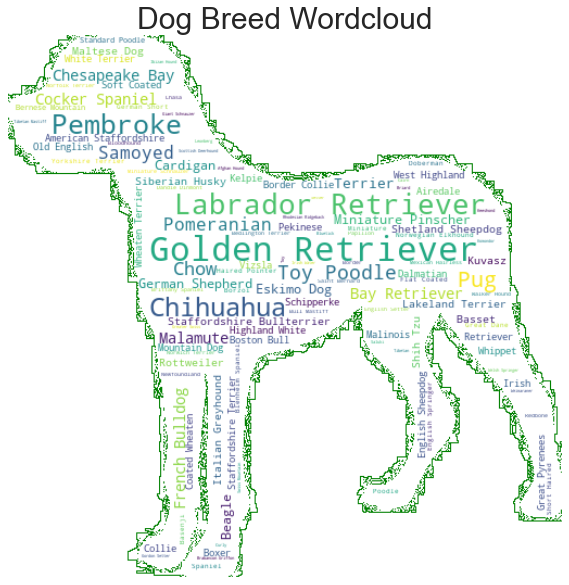

In [95]:
# Wordcloud for dog_breed visualization:
text = df_dog_breed.loc[:, 'dog_best'].str.cat(others=None, sep=' ')

# Read the mask image
dog_mask = np.array(Image.open('dog-s.jpg'))

# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=200, mask=dog_mask, stopwords=STOPWORDS,
              width=640, height=480,contour_width=.01, 
                      contour_color='green')
# Generate word cloud
wc.generate(text)
# Show word cloud
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=30)
plt.axis('off');


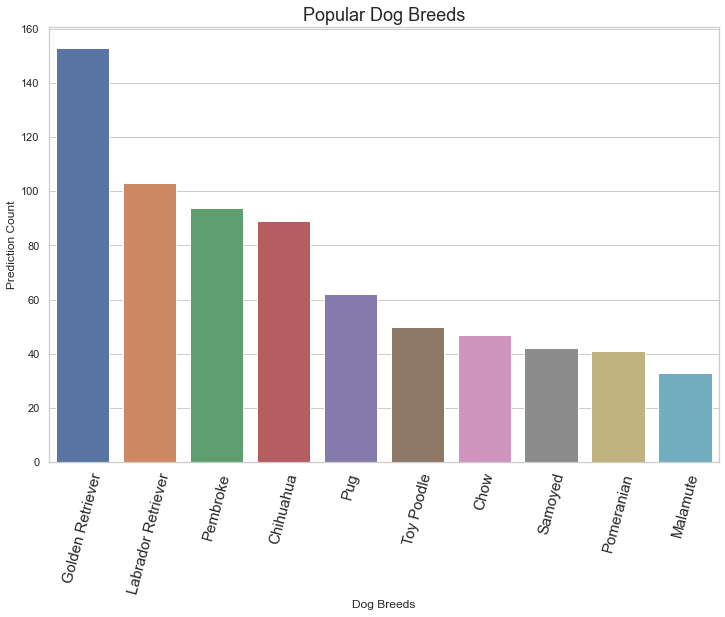

In [96]:
# Most popular dog breeds
plt.figure(figsize = (12,8))
ax = sns.barplot(x = df_dog_breed['dog_best'].value_counts()[0:10].index,
            y =df_dog_breed['dog_best'].value_counts()[0:10],
            data = df_dog_breed);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 12);
plt.ylabel("Prediction Count",fontsize = 12);
plt.title("Popular Dog Breeds",fontsize = 18);

_**Notes**_
> According to the neural network, the Golden Retriever is the most pouplar dog breed. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close to each other, they are in the second, the third, and the fourth place respectively. 

#### Top 5 most Popular dog breed "Golden Retriever" by favorite counts

In [97]:
Golden_retriever_df = df_dog_breed.query('dog_best == "Golden Retriever"')

Golden_retriever_df.sort_values(by='favorites', ascending = False,inplace=True)

Top_5_breeds_fav=Golden_retriever_df[['favorites','rating','dog_best','jpg_url']].head()
Top_5_breeds_fav

<ipython-input-97-e17bc742b4ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Golden_retriever_df.sort_values(by='favorites', ascending = False,inplace=True)


favorites  rating          dog_best  \
96       85011    13.0  Golden Retriever   
499      55683    13.0  Golden Retriever   
194      48410    13.0  Golden Retriever   
40       46860    13.5  Golden Retriever   
46       45880    13.0  Golden Retriever   

                                                                                     jpg_url  
96                                           https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg  
499  https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg  
194                                          https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg  
40                                           https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg  
46                                           https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg

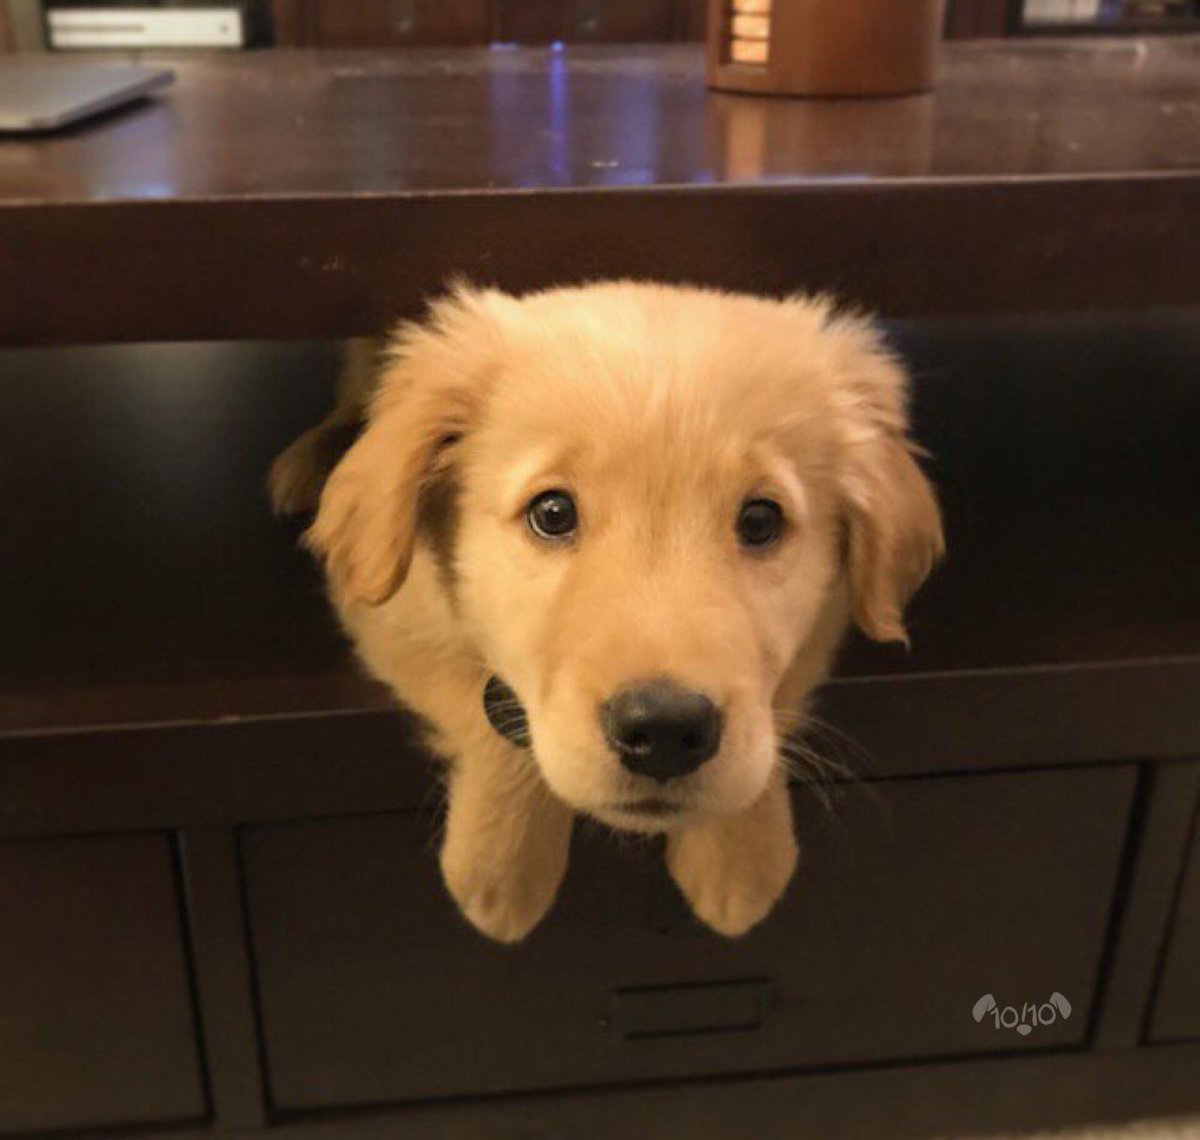

In [98]:
#First one
url = Top_5_breeds_fav.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

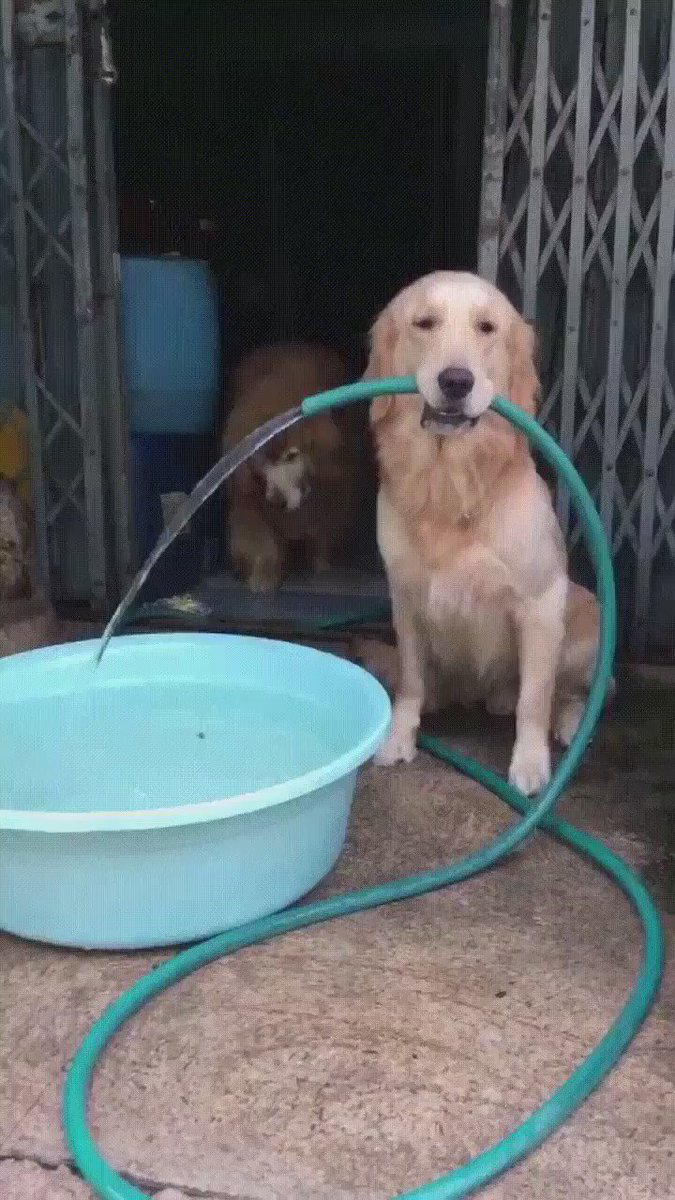

In [99]:
#Second one
url = Top_5_breeds_fav.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

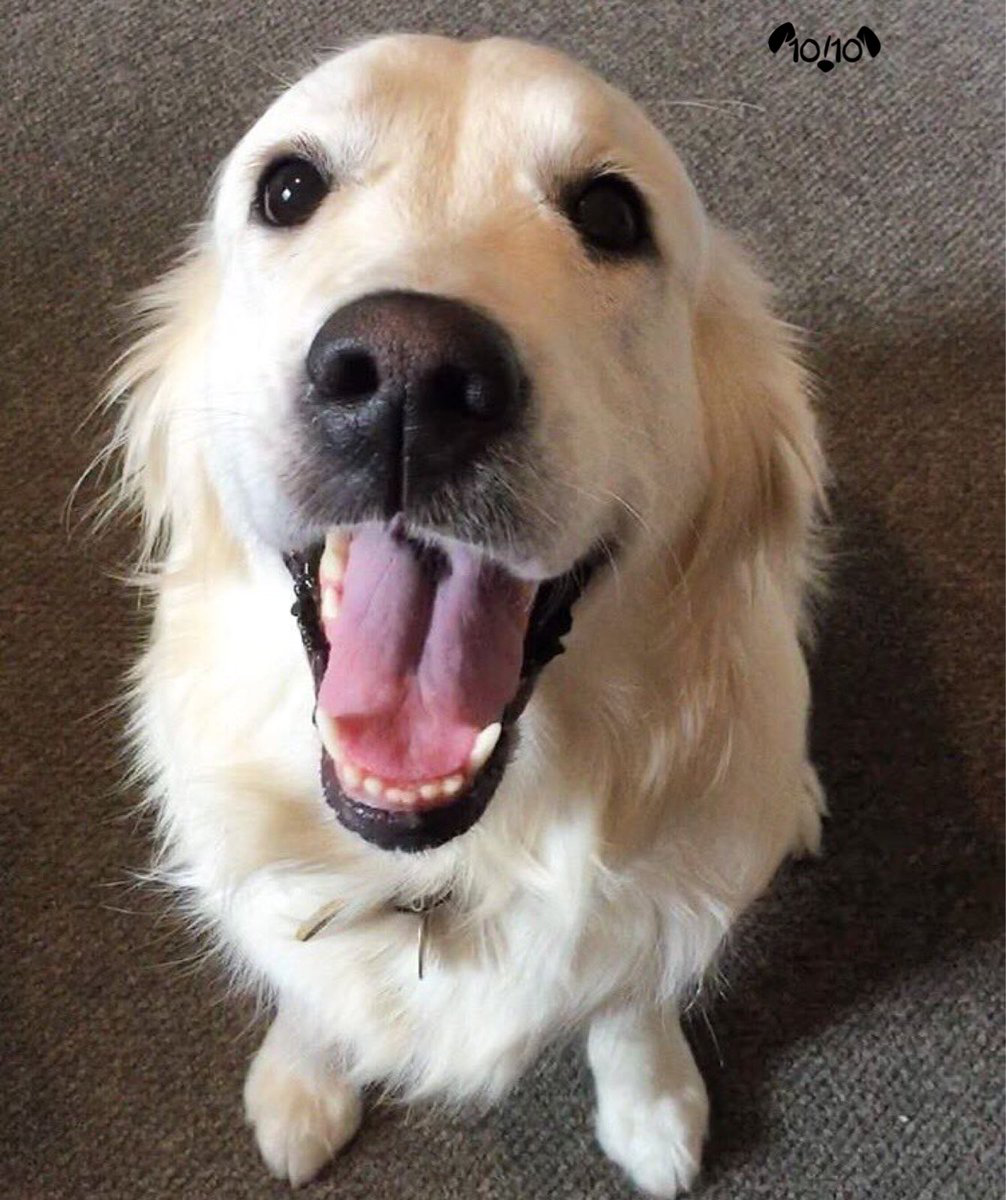

In [100]:
#Third one
url = Top_5_breeds_fav.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

#### Top 5 dog breeds by average rating 

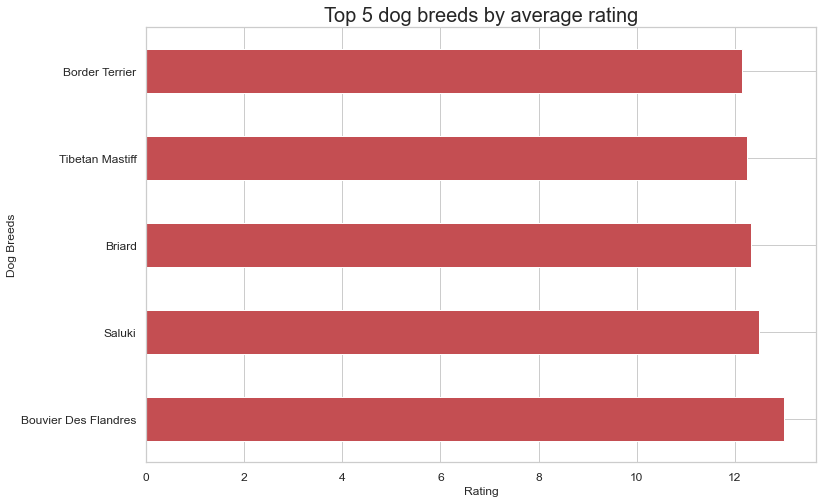

In [101]:
# Extract top 5 average rating breed
top_5_rating = df_dog_breed.groupby('dog_best')['rating'].mean().sort_values(ascending=False).nlargest(5)
plt.figure(figsize=(12,8))
plt.title("Top 5 dog breeds by average rating", size=20)
top_5_rating.plot(kind='barh',fontsize=12,color='r')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

In [102]:
# print top 5 dog breeds by average rating
print('Top 5 dog breeds by average rating', list(top_5_rating.index))

Top 5 dog breeds by average rating ['Bouvier Des Flandres', 'Saluki', 'Briard', 'Tibetan Mastiff', 'Border Terrier']


#### Top 5 dog breeds by aggregate favorite counts

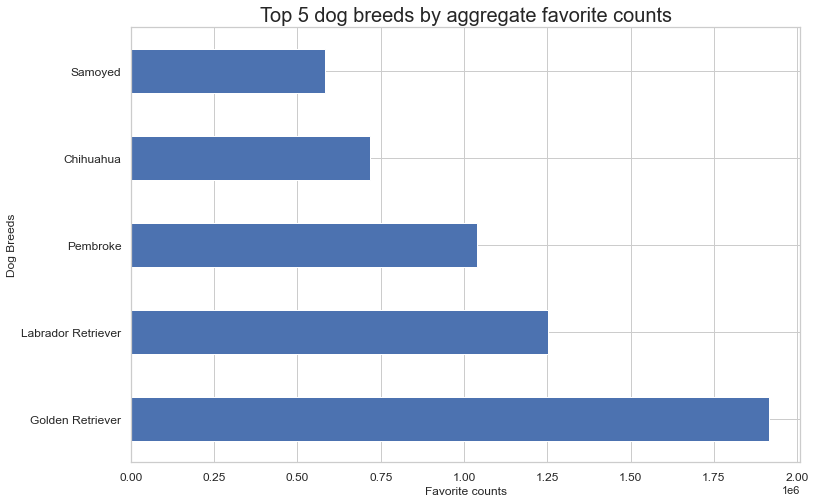

In [103]:
# Extract top 5 average rating breed
top_5_favorite = df_dog_breed.groupby('dog_best')['favorites'].sum().sort_values(ascending=False).nlargest(5)
plt.figure(figsize=(12,8))
plt.title("Top 5 dog breeds by aggregate favorite counts", size=20)
top_5_favorite.plot(kind='barh',fontsize=12,color='b')
plt.xlabel('Favorite counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")


_**Notes**_
>The plot above shows the top 5 dog breeds ranked by aggregate favourite counts. 
We found that Golden retriever is the most liked , Labrador Retriever in the second place and Pembroke in the third place.